## Apparence = façon dont les pages web de Michelin apparaissent dans les résultats de recherche Google

### Différentes façons dont les pages peuvent être présentées aux utilisateurs dans les SERP (Search Engine Results Pages). 

Ici:

° "Extraits de produits" : Des informations structurées sur des produits spécifiques (pneus Michelin), généralement avec des détails comme le prix, les évaluations, etc.

° "Extrait d'avis" : Des morceaux d'avis clients qui apparaissent sous une page dans les résultats

° "Résultats traduits" : Résultats qui ont été automatiquement traduits par le moteur de recherche

° "Vidéos" : Résultats de recherche affichant des vidéos avec vignettes

## CTR Définition

Le taux de clics (TDC ou CTR) est un rapport entre le nombre de clics qu'un élément reçoit et le nombre d'affichages de celui-ci. Il s'exprime en pourcentage. Par exemple, si une bannière publicitaire est affichée 1 000 fois et reçoit 10 clics, le taux de clics sera de 1 %.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from tabulate import tabulate

# Lecture du fichier Excel
file_path = '../Clean_data/Apparence_dans_les_résultats_de_recherche_all.xlsx'

df = pd.read_excel(file_path)

In [48]:
# Filtrer pour exclure la catégorie "Global"
df_filtered = df[df['Source'] != 'Global'].copy()

# Garder une copie des données brutes pour les analyses
df_analysis = df_filtered.copy()

# Formater les valeurs UNIQUEMENT pour l'affichage
df_display = df_filtered.copy()
df_display['CTR'] = df_display['CTR'].apply(lambda x: f"{x:.4f}")
df_display['Position'] = df_display['Position'].apply(lambda x: f"{x:.2f}")

# Afficher le tableau formaté
print("=== Données d'apparence dans les résultats de recherche ===")
print(tabulate(df_display, headers='keys', tablefmt='pretty', showindex=False))

=== Données d'apparence dans les résultats de recherche ===
+-------------------------------------------+-------+-------------+--------+----------+------------------+
| Apparence_dans_les_résultats_de_recherche | Clics | Impressions |  CTR   | Position |      Source      |
+-------------------------------------------+-------+-------------+--------+----------+------------------+
|           Extraits de produits            |  447  |    61981    | 0.0072 |  15.57   | manufacturer URL |
|              Extrait d'avis               |  44   |    16375    | 0.0027 |  62.47   |    Tesla KWD     |
|           Extraits de produits            |   4   |    2593     | 0.0015 |  64.64   |    Tesla KWD     |
|              Extrait d'avis               |   1   |     702     | 0.0014 |  21.28   |   Electric KWD   |
|           Extraits de produits            |   0   |     207     | 0.0000 |  12.42   |   Electric KWD   |
|            Résultats traduits             |   3   |     34      | 0.0882 |  10.62 

# Analyses globales par apparence

=== Statistiques par apparence ===
                                                            Clics  \
Apparence_dans_les_résultats_de_recherche Source                    
Extrait d'avis                            Electric KWD          1   
                                          Tesla KWD            44   
Extraits de produits                      Electric KWD          0   
                                          Electric URL          1   
                                          Tesla KWD             4   
                                          manufacturer URL    447   
Résultats traduits                        Electric URL          3   

                                                            Impressions  \
Apparence_dans_les_résultats_de_recherche Source                          
Extrait d'avis                            Electric KWD              702   
                                          Tesla KWD               16375   
Extraits de produits                      E

<Figure size 1500x800 with 0 Axes>

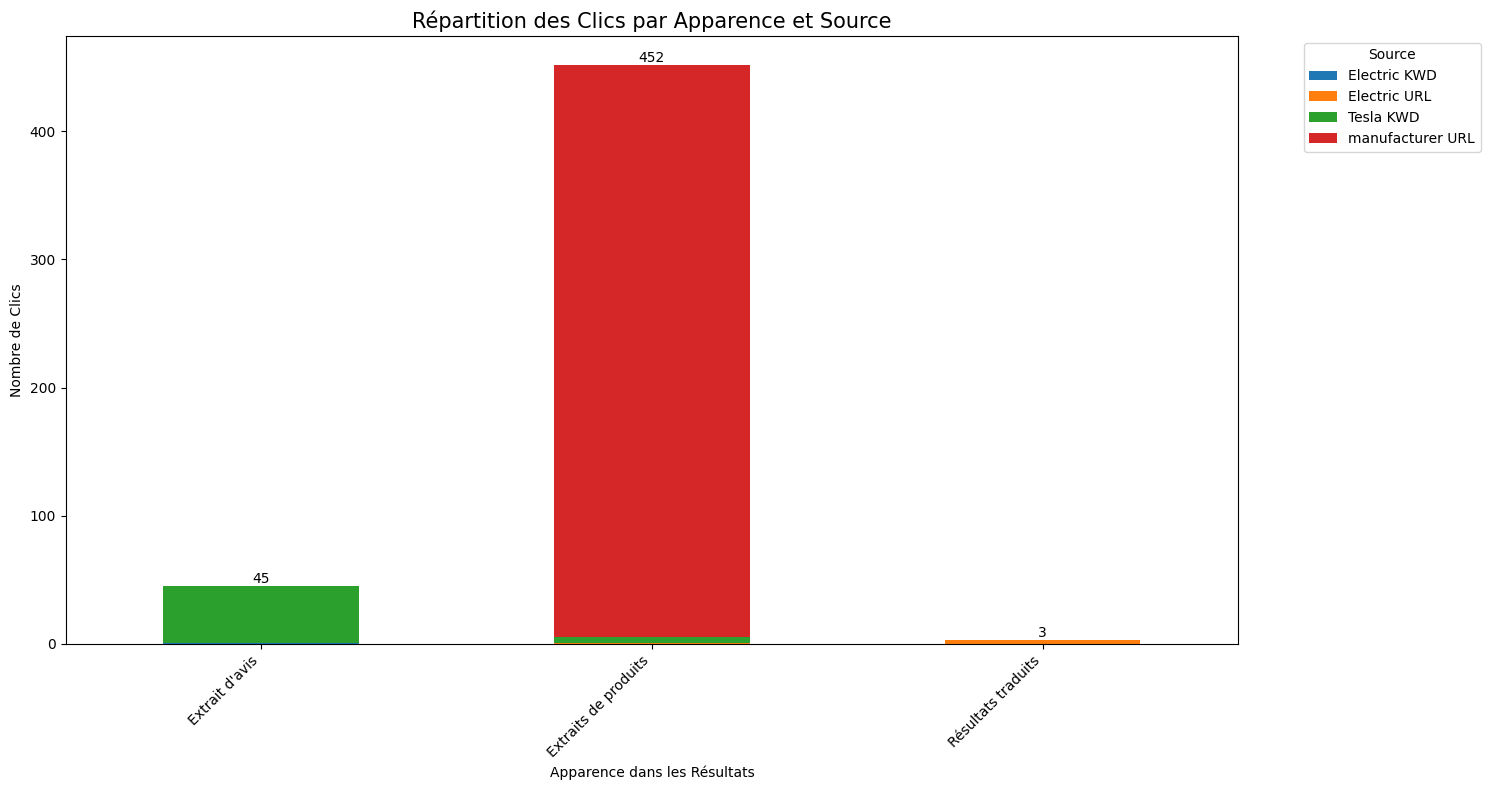

<Figure size 1500x800 with 0 Axes>

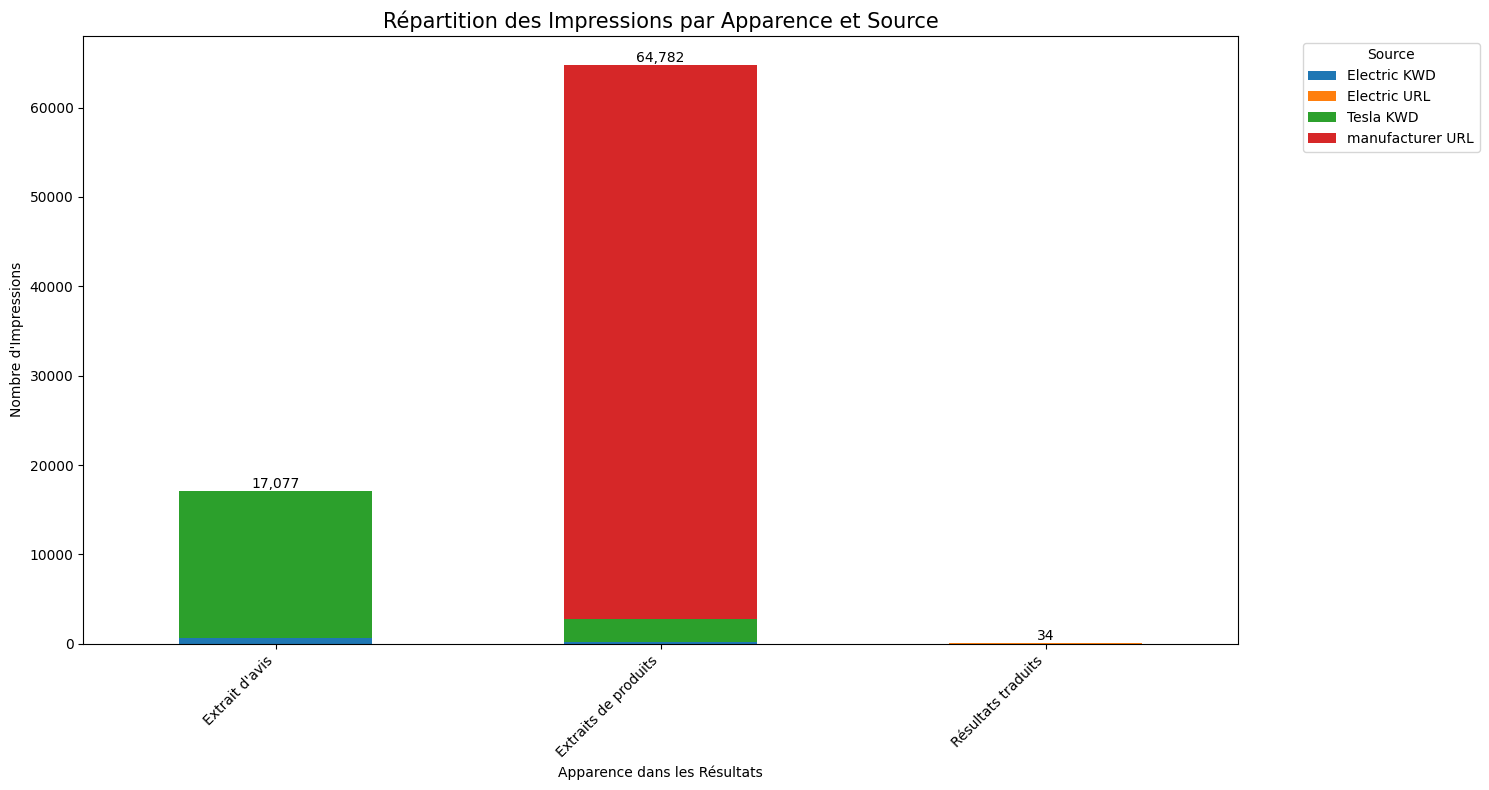


=== KPIs Globaux ===
Total Clics: 500
Total Impressions: 81893
CTR Moyen: 0.1573
Position Moyenne: 26.86


In [95]:
def generate_appearance_stats(df_filtered):
    """
    Générer des statistiques détaillées par apparence et source
    """
    return df_filtered.groupby(['Apparence_dans_les_résultats_de_recherche', 'Source']).agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': 'mean',
        'Position': 'mean'
    }).round(4)

def compare_campaign_types(df_filtered):
    """
    Comparer les performances par type de source
    """
    return df_filtered.groupby('Source').agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': 'mean',
        'Position': 'mean'
    }).round(4)

def plot_appearance_clicks_by_source(df_filtered):
    """
    Générer un graphique des clics par apparence et type de source en barres empilées
    """
    plt.figure(figsize=(15, 8))
    
    # Calculer les clics par apparence et source
    clics_par_apparence_source = df_filtered.groupby(['Apparence_dans_les_résultats_de_recherche', 'Source'])['Clics'].sum().unstack()
    
    # Créer le graphique à barres empilées
    clics_par_apparence_source.plot(kind='bar', stacked=True, figsize=(15, 8))
    
    plt.title('Répartition des Clics par Apparence et Source', fontsize=15)
    plt.xlabel('Apparence dans les Résultats')
    plt.ylabel('Nombre de Clics')
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    
    # Ajouter les valeurs totales sur les barres
    for i, total in enumerate(clics_par_apparence_source.sum(axis=1)):
        plt.text(i, total, f'{total:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Créer le dossier assets s'il n'existe pas
    os.makedirs('../assets', exist_ok=True)
    
    # Sauvegarder la figure
    plt.savefig('../assets/appearance_clicks_by_source.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_appearance_impressions_by_source(df_filtered):
    """
    Générer un graphique des impressions par apparence et type de source
    """
    plt.figure(figsize=(15, 8))
    
    # Calculer les impressions par apparence et source
    impressions_par_apparence_source = df_filtered.groupby(['Apparence_dans_les_résultats_de_recherche', 'Source'])['Impressions'].sum().unstack()
    
    # Créer le graphique à barres empilées
    impressions_par_apparence_source.plot(kind='bar', stacked=True, figsize=(15, 8))
    
    plt.title('Répartition des Impressions par Apparence et Source', fontsize=15)
    plt.xlabel('Apparence dans les Résultats')
    plt.ylabel('Nombre d\'Impressions')
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    
    # Ajouter les valeurs totales sur les barres
    for i, total in enumerate(impressions_par_apparence_source.sum(axis=1)):
        plt.text(i, total, f'{total:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Sauvegarder la figure
    plt.savefig('../assets/appearance_impressions_by_source.png', dpi=300, bbox_inches='tight')
    plt.show()

def analyze_positions(df_filtered):
    """
    Analyser les positions moyennes par apparence et source
    """
    return pd.pivot_table(
        df_filtered,
        values='Position',
        index='Apparence_dans_les_résultats_de_recherche',
        columns='Source',
        aggfunc='mean'
    ).round(2)

def categoriser_fiabilite(impressions):
    """
    Catégoriser la fiabilité basée sur le nombre d'impressions
    """
    if impressions > 10000:
        return 'Excellente'
    elif impressions > 1000:
        return 'Bonne'
    elif impressions > 100:
        return 'Moyenne'
    elif impressions > 10:
        return 'Faible'
    else:
        return 'Très faible'

def analyse_complete(df_filtered):
    """
    Fonction principale pour l'analyse complète
    """
    try:
        # Ajouter la colonne de fiabilité
        df_filtered['Fiabilite'] = df_filtered['Impressions'].apply(categoriser_fiabilite)
        
        print("=== Statistiques par apparence ===")
        appearance_stats = generate_appearance_stats(df_filtered)
        print(appearance_stats)
        
        print("\n=== Comparaison des types de sources ===")
        campaign_stats = compare_campaign_types(df_filtered)
        print(campaign_stats)
        
        print("\n=== Analyse des positions moyennes ===")
        position_stats = analyze_positions(df_filtered)
        print(position_stats)
        
        # Visualisations
        plot_appearance_clicks_by_source(df_filtered)
        plot_appearance_impressions_by_source(df_filtered)
        
        # KPIs globaux
        kpis = {
            'Total Clics': df_filtered['Clics'].sum(),
            'Total Impressions': df_filtered['Impressions'].sum(),
            'CTR Moyen': df_filtered['CTR'].mean(),
            'Position Moyenne': df_filtered['Position'].mean().round(2)
        }
        
        print("\n=== KPIs Globaux ===")
        for kpi, value in kpis.items():
            if kpi == 'CTR Moyen':
                print(f"{kpi}: {value:.4f}")
            else:
                print(f"{kpi}: {value}")
        
        return {
            'appearance_stats': appearance_stats,
            'campaign_stats': campaign_stats,
            'position_stats': position_stats,
            'kpis': kpis
        }
    
    except Exception as e:
        print(f"Une erreur s'est produite: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

resultat = analyse_complete(df_filtered)

## Type d'apparence disponible dans le dataset par source

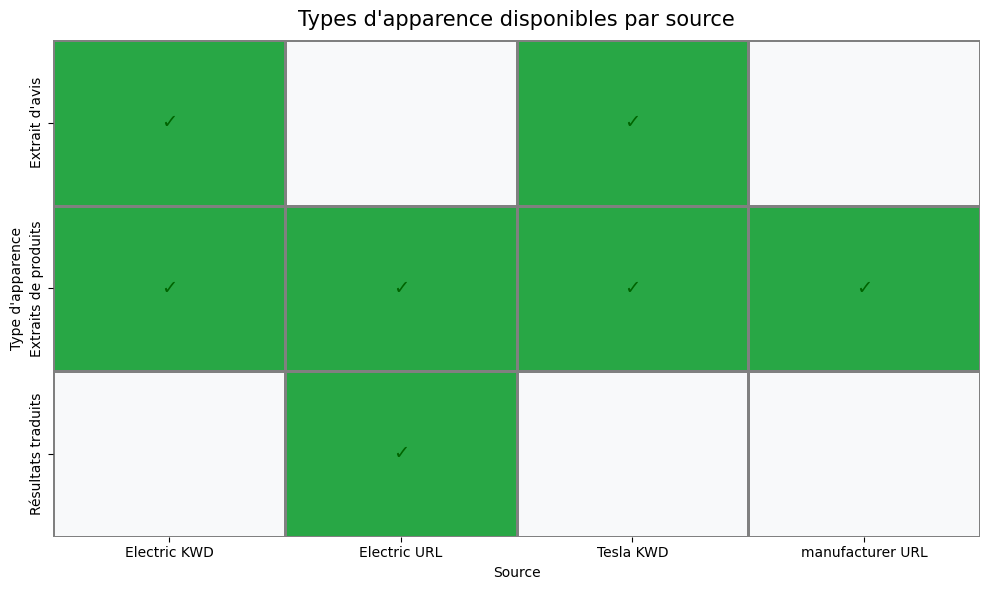

=== Types d'apparence disponibles par source ===

Source: Electric KWD
Nombre de types d'apparence: 2
Types d'apparence disponibles:
  1. Extrait d'avis
  2. Extraits de produits

Source: Electric URL
Nombre de types d'apparence: 2
Types d'apparence disponibles:
  1. Résultats traduits
  2. Extraits de produits

Source: Tesla KWD
Nombre de types d'apparence: 2
Types d'apparence disponibles:
  1. Extrait d'avis
  2. Extraits de produits

Source: manufacturer URL
Nombre de types d'apparence: 1
Types d'apparence disponibles:
  1. Extraits de produits


In [52]:
# Créer une matrice de présence (1) ou absence (0)
types_all = sorted(df_filtered['Apparence_dans_les_résultats_de_recherche'].unique())
sources = sorted(df_filtered['Source'].unique())

# Créer un DataFrame pour la matrice de présence
presence_matrix = pd.DataFrame(0, index=types_all, columns=sources)

# Remplir la matrice
for source in sources:
    types_in_source = df_filtered[df_filtered['Source'] == source]['Apparence_dans_les_résultats_de_recherche'].unique()
    for type_app in types_in_source:
        presence_matrix.loc[type_app, source] = 1

# Créer la visualisation
plt.figure(figsize=(10, 6))

# Utiliser une heatmap avec une palette personnalisée
ax = sns.heatmap(presence_matrix, cmap=['#f8f9fa', '#28a745'], cbar=False, 
            linewidths=.8, linecolor='gray')

# Ajouter des annotations dans les cellules
for i in range(len(types_all)):
    for j in range(len(sources)):
        if presence_matrix.iloc[i, j] == 1:
            ax.text(j + 0.5, i + 0.5, '✓', 
                    ha='center', va='center', fontsize=14, color='darkgreen',
                    fontweight='bold')

# Personnaliser l'apparence
plt.title('Types d\'apparence disponibles par source', fontsize=15, pad=10)
plt.ylabel('Type d\'apparence')
plt.xlabel('Source')

# Ajuster l'affichage
plt.tight_layout()

# Créer le dossier assets s'il n'existe pas
os.makedirs('../assets', exist_ok=True)

# Sauvegarder et afficher
plt.savefig('../assets/types_apparence_par_source.png', dpi=300, bbox_inches='tight')
plt.show()

# Afficher également un résumé textuel pour référence
print("=== Types d'apparence disponibles par source ===")
for source in sources:
    types_apparence = df_filtered[df_filtered['Source'] == source]['Apparence_dans_les_résultats_de_recherche'].unique()
    print(f"\nSource: {source}")
    print(f"Nombre de types d'apparence: {len(types_apparence)}")
    print("Types d'apparence disponibles:")
    for i, type_app in enumerate(types_apparence, 1):
        print(f"  {i}. {type_app}")

## Volume d'impressions par type d'apparence et source

=== Volume d'impressions par type d'apparence et source ===
Source                                     Electric KWD  Electric URL  \
Apparence_dans_les_résultats_de_recherche                               
Extrait d'avis                                    702.0           0.0   
Extraits de produits                              207.0           1.0   
Résultats traduits                                  0.0          34.0   

Source                                     Tesla KWD  manufacturer URL  
Apparence_dans_les_résultats_de_recherche                               
Extrait d'avis                               16375.0               0.0  
Extraits de produits                          2593.0           61981.0  
Résultats traduits                               0.0               0.0  


<Figure size 1200x800 with 0 Axes>

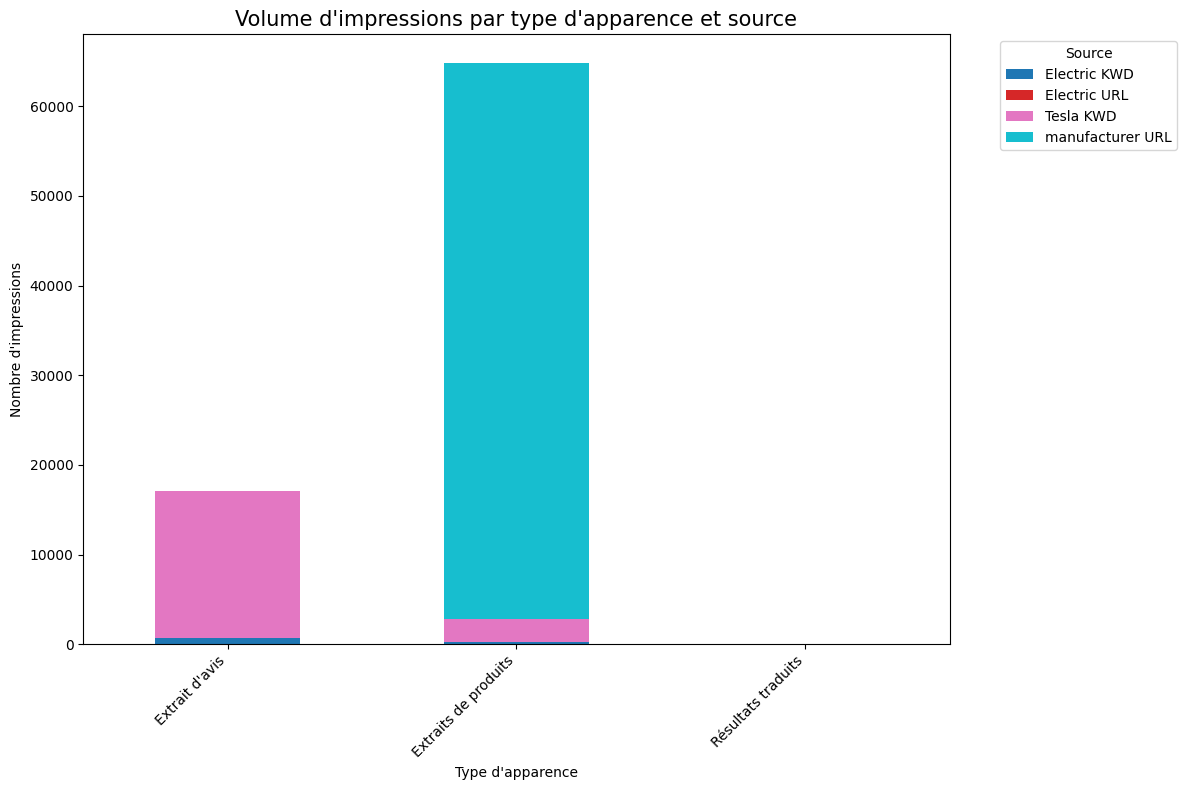

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Créer le tableau croisé
print("=== Volume d'impressions par type d'apparence et source ===")
impressions_matrix = pd.crosstab(
    df_filtered['Apparence_dans_les_résultats_de_recherche'], 
    df_filtered['Source'],
    values=df_filtered['Impressions'],
    aggfunc='sum'
).fillna(0)

# Afficher le tableau original
print(impressions_matrix)

# Créer le dossier assets s'il n'existe pas
os.makedirs('../assets', exist_ok=True)

# Créer le graphique à barres empilées
plt.figure(figsize=(12, 8))
impressions_matrix.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')
plt.title('Volume d\'impressions par type d\'apparence et source', fontsize=15)
plt.ylabel('Nombre d\'impressions')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Sauvegarder cette version
plt.savefig('../assets/impressions_volume_barplot.png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.show()

## Volume d'impressions par type d'apparence, toutes sources confondues

In [61]:
impressions_par_type = df_filtered.groupby('Apparence_dans_les_résultats_de_recherche').agg({
    'Impressions': 'sum',
    'Clics': 'sum'
}).reset_index()

# Calculer également le CTR pour référence
impressions_par_type['CTR'] = (impressions_par_type['Clics'] / impressions_par_type['Impressions']).round(4)

# Trier par volume d'impressions décroissant
impressions_par_type = impressions_par_type.sort_values('Impressions', ascending=False)

print("=== Volume d'impressions par type d'apparence (toutes sources confondues, sauf Global) ===")
print(impressions_par_type[['Apparence_dans_les_résultats_de_recherche', 'Impressions', 'Clics', 'CTR']])

# Calcul du pourcentage du total
total_impressions = impressions_par_type['Impressions'].sum()
impressions_par_type['Pourcentage'] = (impressions_par_type['Impressions'] / total_impressions * 100).round(2)

print("\n=== Distribution des impressions (%) ===")
print(impressions_par_type[['Apparence_dans_les_résultats_de_recherche', 'Impressions', 'Pourcentage']])

=== Volume d'impressions par type d'apparence (toutes sources confondues, sauf Global) ===
  Apparence_dans_les_résultats_de_recherche  Impressions  Clics     CTR
1                      Extraits de produits        64782    452  0.0070
0                            Extrait d'avis        17077     45  0.0026
2                        Résultats traduits           34      3  0.0882

=== Distribution des impressions (%) ===
  Apparence_dans_les_résultats_de_recherche  Impressions  Pourcentage
1                      Extraits de produits        64782        79.11
0                            Extrait d'avis        17077        20.85
2                        Résultats traduits           34         0.04


## Volume de clics par type d'apparence et source

=== Volume de clics par type d'apparence et source ===
Source                                     Electric KWD  Electric URL  \
Apparence_dans_les_résultats_de_recherche                               
Extrait d'avis                                      1.0           0.0   
Extraits de produits                                0.0           1.0   
Résultats traduits                                  0.0           3.0   

Source                                     Tesla KWD  manufacturer URL  
Apparence_dans_les_résultats_de_recherche                               
Extrait d'avis                                  44.0               0.0  
Extraits de produits                             4.0             447.0  
Résultats traduits                               0.0               0.0  


<Figure size 1200x800 with 0 Axes>

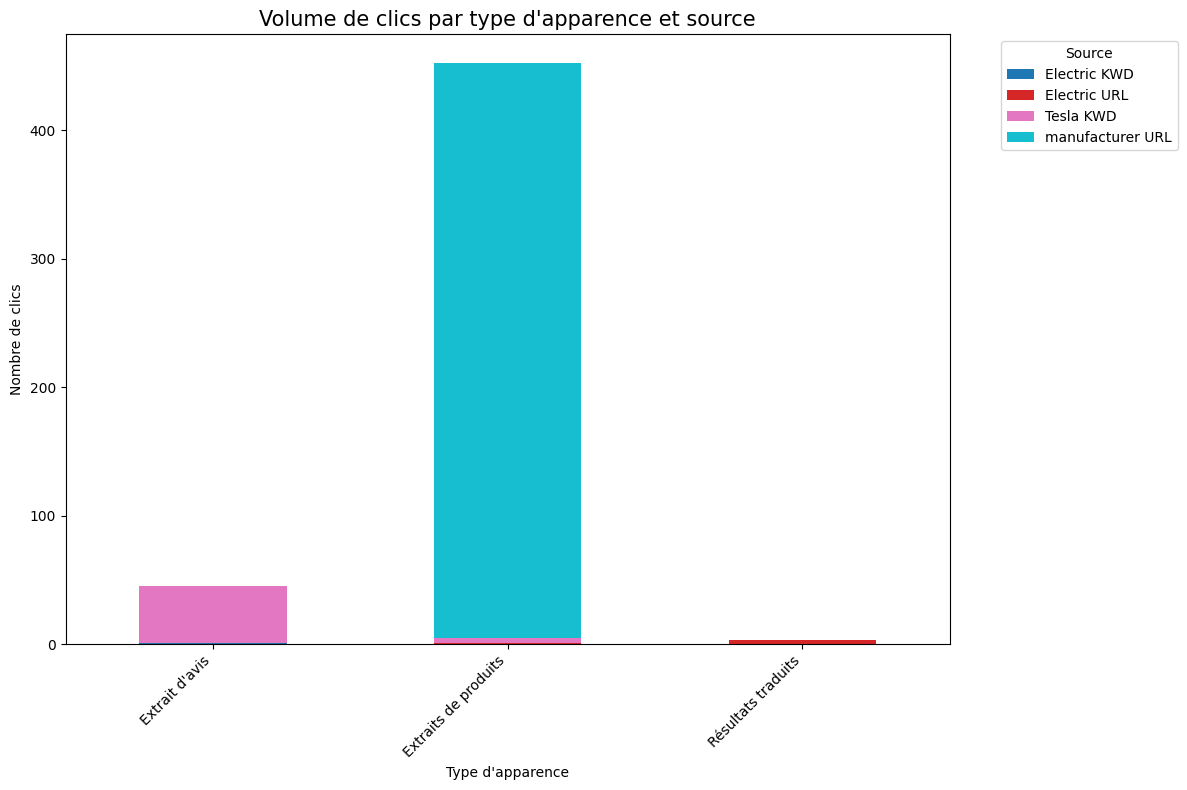

In [83]:
# Créer le tableau croisé des clics
print("=== Volume de clics par type d'apparence et source ===")
clics_matrix = pd.crosstab(
    df_filtered['Apparence_dans_les_résultats_de_recherche'], 
    df_filtered['Source'],
    values=df_filtered['Clics'],
    aggfunc='sum'
).fillna(0)

# Afficher le tableau original
print(clics_matrix)

# Créer le dossier assets s'il n'existe pas
os.makedirs('../assets', exist_ok=True)

# Créer le graphique à barres empilées
plt.figure(figsize=(12, 8))
clics_matrix.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')
plt.title('Volume de clics par type d\'apparence et source', fontsize=15)
plt.ylabel('Nombre de clics')
plt.xlabel('Type d\'apparence')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Sauvegarder cette version
plt.savefig('../assets/clics_volume_barplot.png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.show()

## Volume d'impressions par type d'apparence, toutes sources confondues

In [84]:
# Agrégation des données
clics_par_type = df_filtered.groupby('Apparence_dans_les_résultats_de_recherche').agg({
    'Impressions': 'sum',
    'Clics': 'sum'
}).reset_index()

# Calculer le CTR pour référence
clics_par_type['CTR'] = (clics_par_type['Clics'] / clics_par_type['Impressions']).round(4)

# Trier par volume de clics décroissant
clics_par_type = clics_par_type.sort_values('Clics', ascending=False)

print("=== Volume de clics par type d'apparence (toutes sources confondues, sauf Global) ===")
print(clics_par_type[['Apparence_dans_les_résultats_de_recherche', 'Impressions', 'Clics', 'CTR']])

# Calcul du pourcentage du total de clics
total_clics = clics_par_type['Clics'].sum()
clics_par_type['Pourcentage'] = (clics_par_type['Clics'] / total_clics * 100).round(2)

print("\n=== Distribution des clics (%) ===")
print(clics_par_type[['Apparence_dans_les_résultats_de_recherche', 'Clics', 'Pourcentage']])

=== Volume de clics par type d'apparence (toutes sources confondues, sauf Global) ===
  Apparence_dans_les_résultats_de_recherche  Impressions  Clics     CTR
1                      Extraits de produits        64782    452  0.0070
0                            Extrait d'avis        17077     45  0.0026
2                        Résultats traduits           34      3  0.0882

=== Distribution des clics (%) ===
  Apparence_dans_les_résultats_de_recherche  Clics  Pourcentage
1                      Extraits de produits    452         90.4
0                            Extrait d'avis     45          9.0
2                        Résultats traduits      3          0.6


## CTR par type d'apparence, toutes sources confondues

In [24]:
# Agréger les données par type d'apparence, toutes sources confondues (sauf Global)
ctr_par_type = df_filtered.groupby('Apparence_dans_les_résultats_de_recherche').agg({
    'Clics': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Calculer le CTR
ctr_par_type['CTR'] = (ctr_par_type['Clics'] / ctr_par_type['Impressions']).round(4)

# Créer une catégorie de fiabilité basée sur le volume d'impressions
def categoriser_fiabilite(impressions):
    if impressions > 10000:
        return 'Excellente'
    elif impressions > 1000:
        return 'Bonne'
    elif impressions > 100:
        return 'Moyenne'
    elif impressions > 10:
        return 'Faible'
    else:
        return 'Très faible'

ctr_par_type['Fiabilité'] = ctr_par_type['Impressions'].apply(categoriser_fiabilite)

# Trier d'abord par fiabilité (en tant que catégorie ordonnée), puis par CTR
ordre_fiabilite = {'Excellente': 5, 'Bonne': 4, 'Moyenne': 3, 'Faible': 2, 'Très faible': 1}
ctr_par_type['Ordre'] = ctr_par_type['Fiabilité'].map(ordre_fiabilite)
ctr_par_type = ctr_par_type.sort_values(['Ordre', 'CTR'], ascending=[False, False])

print("=== CTR par type d'apparence (toutes sources confondues, sauf Global) ===")
print(ctr_par_type[['Apparence_dans_les_résultats_de_recherche', 'CTR', 'Clics', 'Impressions', 'Fiabilité']])

=== CTR par type d'apparence (toutes sources confondues, sauf Global) ===
  Apparence_dans_les_résultats_de_recherche     CTR  Clics  Impressions  \
1                      Extraits de produits  0.0070    452        64782   
0                            Extrait d'avis  0.0026     45        17077   
2                        Résultats traduits  0.0882      3           34   

    Fiabilité  
1  Excellente  
0  Excellente  
2      Faible  


On voit ici que l'apparence avec le plus de CTR sont les **résultats traduits**, mais la fiabilité (quantité de données) est très faible. La seconde catégorie la plus haute pour le CTR serait les **extraits de produits**, présentant une excellente fiabilité

## CTR par type d'apparence et source


=== CTR avec indication de fiabilité ===
       Type d'apparence            Source     CTR  Impressions    Fiabilité
0        Extrait d'avis      Electric KWD  0.0014        702.0      Moyenne
2  Extraits de produits      Electric URL  1.0000          1.0  Très faible
5    Résultats traduits      Electric URL  0.0882         34.0       Faible
1        Extrait d'avis         Tesla KWD  0.0027      16375.0   Excellente
3  Extraits de produits         Tesla KWD  0.0015       2593.0        Bonne
4  Extraits de produits  manufacturer URL  0.0072      61981.0   Excellente


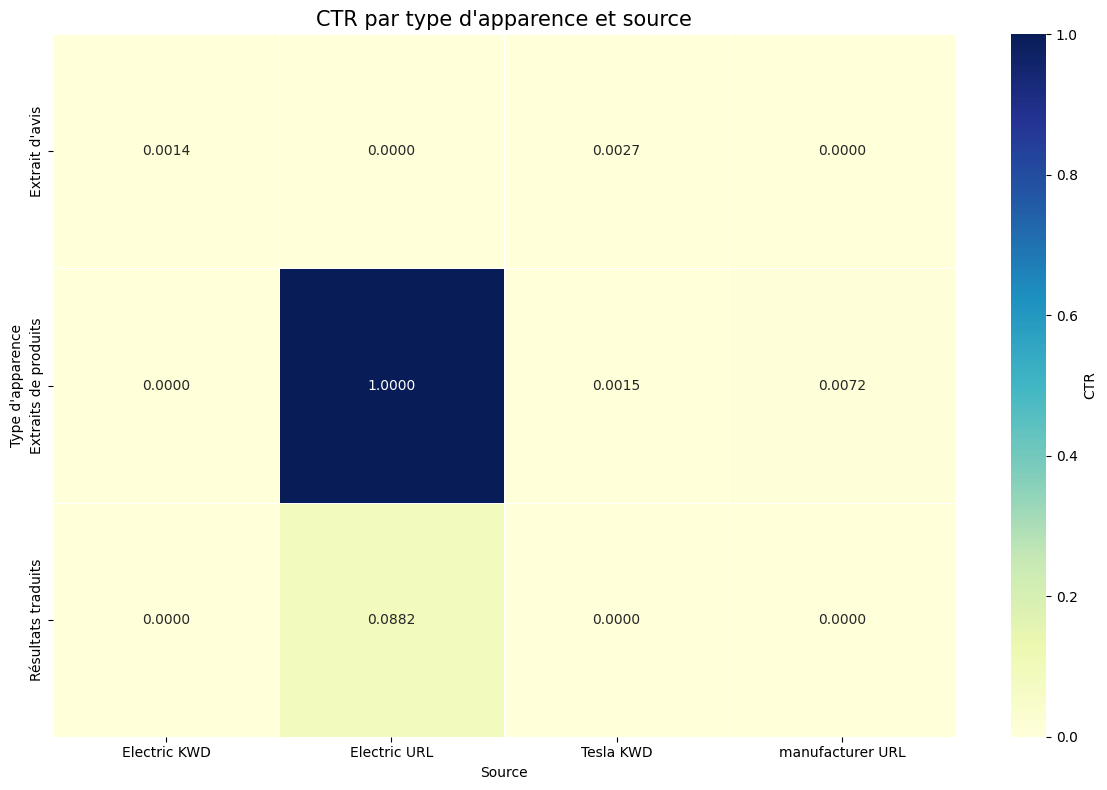

In [63]:
# 1. Créer le tableau CTR par type d'apparence et source
ctr_matrix = pd.crosstab(
    df_filtered['Apparence_dans_les_résultats_de_recherche'], 
    df_filtered['Source'],
    values=df_filtered['CTR'],
    aggfunc='mean'
).round(4).fillna(0)

# 2. Créer un tableau des impressions pour évaluer la fiabilité
impressions_matrix = pd.crosstab(
    df_filtered['Apparence_dans_les_résultats_de_recherche'], 
    df_filtered['Source'],
    values=df_filtered['Impressions'],
    aggfunc='sum'
).fillna(0)

# 3. Créer un tableau de fiabilité basé sur le volume d'impressions
fiabilite_categories = pd.cut(
    impressions_matrix.values.flatten(), 
    bins=[0, 10, 100, 1000, 10000, float('inf')],
    labels=['Très faible', 'Faible', 'Moyenne', 'Bonne', 'Excellente']
)
fiabilite_matrix = pd.DataFrame(
    fiabilite_categories.reshape(impressions_matrix.shape),
    index=impressions_matrix.index,
    columns=impressions_matrix.columns
)

# 4. Créer une version combinée pour faciliter l'interprétation
print("\n=== CTR avec indication de fiabilité ===")
combined_data = []

for appearance in ctr_matrix.index:
    for source in ctr_matrix.columns:
        ctr = ctr_matrix.loc[appearance, source]
        impressions = impressions_matrix.loc[appearance, source]
        fiabilite = fiabilite_matrix.loc[appearance, source]
        
        if ctr > 0:  # Ne montrer que les entrées avec un CTR non nul
            combined_data.append({
                'Type d\'apparence': appearance,
                'Source': source,
                'CTR': ctr,
                'Impressions': impressions,
                'Fiabilité': fiabilite
            })

combined_df = pd.DataFrame(combined_data).sort_values(['Source', 'CTR'], ascending=[True, False])
print(combined_df)

# Créer le dossier assets s'il n'existe pas
os.makedirs('../assets', exist_ok=True)

# 5. Créer une visualisation du CTR par type d'apparence et source sous forme de heatmap
plt.figure(figsize=(12, 8))

# Transformer les données pour faciliter la visualisation
plot_data = combined_df.pivot(index='Type d\'apparence', columns='Source', values='CTR').fillna(0)

# Créer un heatmap
ax = sns.heatmap(plot_data, annot=True, cmap='YlGnBu', fmt='.4f', 
                linewidths=.5, cbar_kws={'label': 'CTR'})

plt.title('CTR par type d\'apparence et source', fontsize=15)
plt.tight_layout()

# Sauvegarder l'image
plt.savefig('../assets/ctr_heatmap.png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.show()

Comme déjà relevé dans de précédentes analyses pour le type d'appareil, ici aussi, *Electric URL* obtient le meilleur taux de CTR en considérant cette fois l'apparence

Les observations se précisent en montrant que c'est surtout le cas pour les **extraîts de produits** - mais ces observations sont à prendre avec du recul car une seule impression a été comptabilisée, qui a donné lieu à un clic (donc un CTR de 1 pour ces extraîts de produits mais pour trop peu de données) ; ainsi qu'un CTR de .0082 pour les **résultats traduits**, toujours pour de très petits scores (3 clics pour 34 impressions) - donc résultats à prendre avec du recul car la **fiabilité** est faible voire très faible

Les **extraits de produits** donnent des résultats probants, avec un score de .0072 pour le CTR, une excellente fiabilité, et l'impression la plus élevrée, pour *manufacturer URL*.

Scores les plus faibles en terme de CTR selon l'apparence se font pour *Electric KWD* et ses **extraîts d'avis**, *Electric KWD* qui obtenait également les scores les plus faibles pour le CTR fonction de l'appareil.

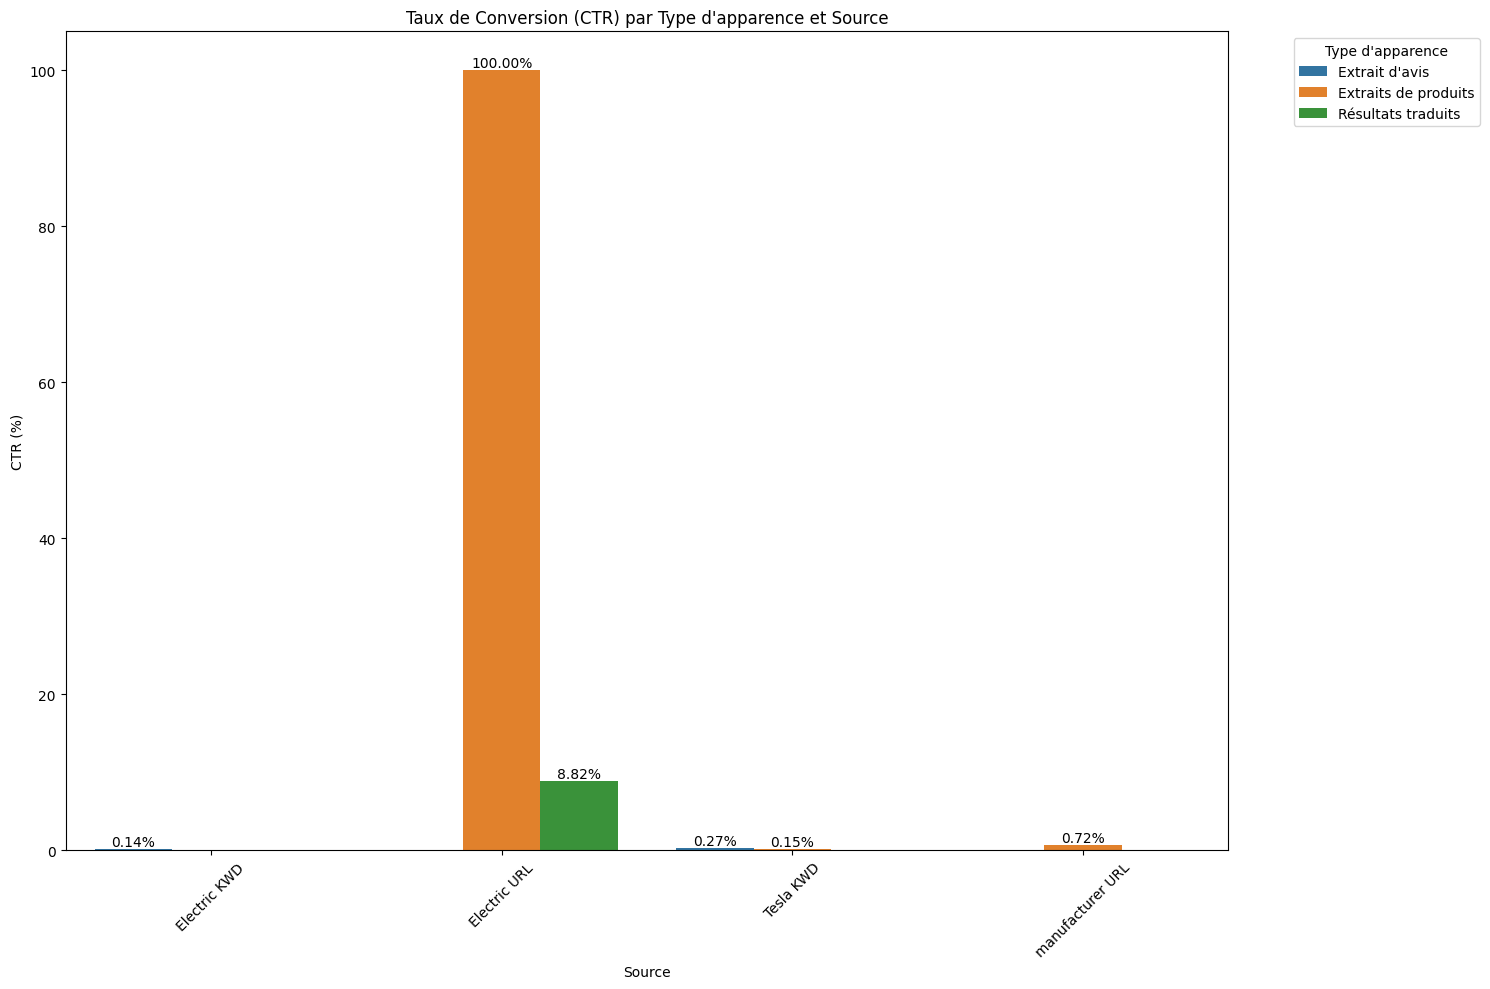

In [97]:
def visualiser_ctr_par_apparence_et_source():
    """
    Générer des graphiques du CTR moyen par type d'apparence et source
    """
    # Préparer les données (à partir de votre code)
    combined_data = []
    
    for appearance in ctr_matrix.index:
        for source in ctr_matrix.columns:
            ctr = ctr_matrix.loc[appearance, source]
            impressions = impressions_matrix.loc[appearance, source]
            fiabilite = fiabilite_matrix.loc[appearance, source]
            
            if ctr > 0:  # Ne montrer que les entrées avec un CTR non nul
                combined_data.append({
                    'Type d\'apparence': appearance,
                    'Source': source,
                    'CTR': ctr * 100,  # Convertir en pourcentage
                    'Impressions': impressions,
                    'Fiabilité': fiabilite
                })
    
    combined_df = pd.DataFrame(combined_data).sort_values(['Source', 'CTR'], ascending=[True, False])
    
    # Créer une figure
    plt.figure(figsize=(15, 10))
    
    # Graphique à barres groupées
    sns.barplot(x='Source', y='CTR', hue='Type d\'apparence', data=combined_df)
    plt.title('Taux de Conversion (CTR) par Type d\'apparence et Source')
    plt.xlabel('Source')
    plt.ylabel('CTR (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Type d\'apparence', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajouter les valeurs sur les barres
    for i in plt.gca().containers:
        plt.gca().bar_label(i, fmt='%.2f%%')
    
    plt.tight_layout()
    
    # Sauvegarder l'image
    os.makedirs('../assets', exist_ok=True)
    plt.savefig('../assets/ctr_by_appearance_source.png', dpi=300, bbox_inches='tight')
    
    # Afficher le graphique
    plt.show()

visualiser_ctr_par_apparence_et_source()

## Positions moyennes par type d'apparence classées par score CTR

=== CTR, position moyenne et fiabilité par type d'apparence ===
  Apparence_dans_les_résultats_de_recherche  CTR_calculé  Position  \
0                            Extrait d'avis       0.0026     41.88   
1                      Extraits de produits       0.0070     23.41   
2                        Résultats traduits       0.0882     10.62   

    Fiabilité  Clics  Impressions  
0  Excellente     45        17077  
1  Excellente    452        64782  
2      Faible      3           34  


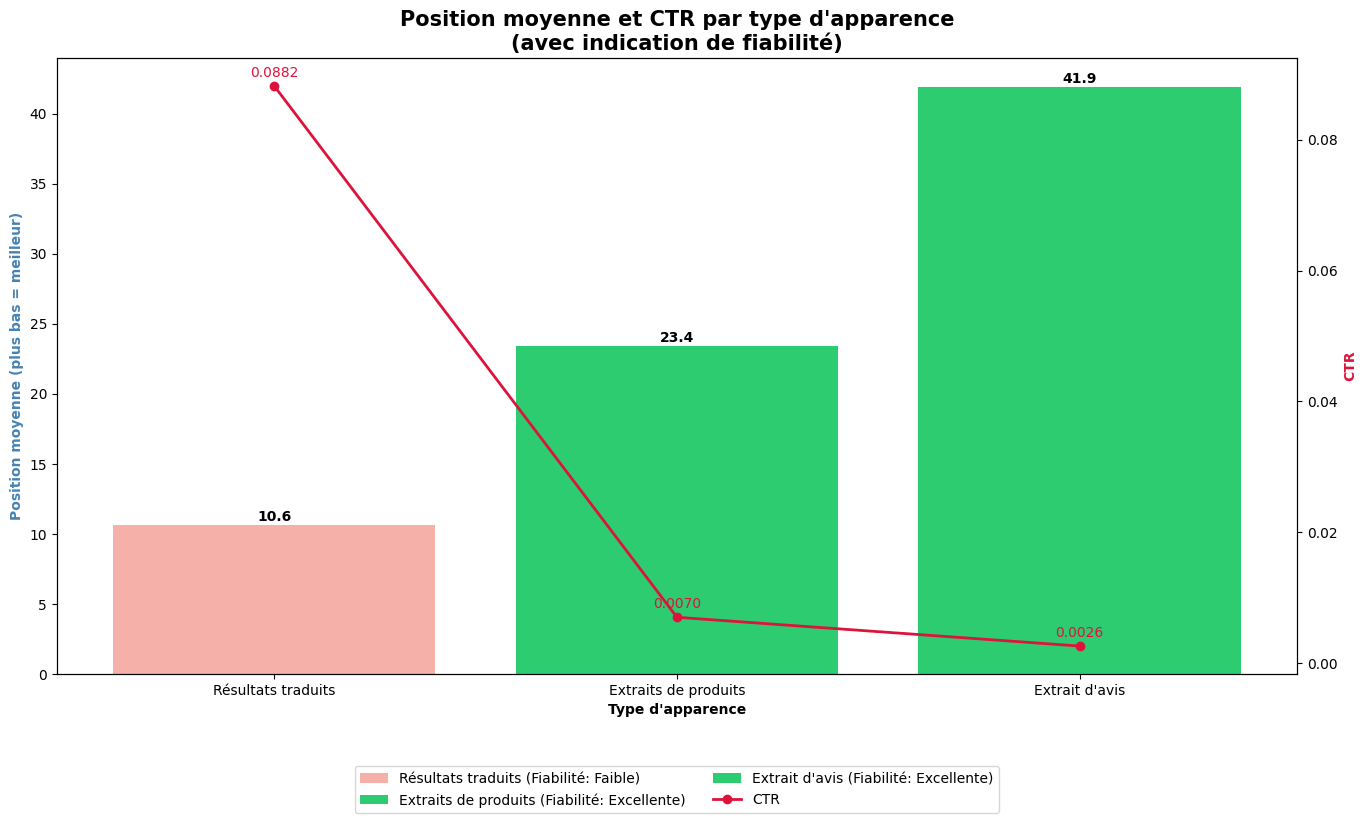

,Apparence_dans_les_résultats_de_recherche,Position,Impressions,Clics,CTR,CTR_calculé,Fiabilité,Score_Fiabilité
0,Extrait d'avis,41.88,17077,45,0.0020,0.0026,Excellente,1.0
1,Extraits de produits,23.41,64782,452,0.2522,0.0070,Excellente,1.0
2,Résultats traduits,10.62,34,3,0.0882,0.0882,Faible,0.2


In [102]:
def analyser_performance_recherche(df_filtered):
    """
    Analyse détaillée de la performance par type d'apparence dans les résultats de recherche
    
    Paramètres:
    -----------
    df_filtered : pandas.DataFrame
        DataFrame contenant les données de recherche
    
    Retourne:
    ---------
    positions_par_type : pandas.DataFrame
        DataFrame résumant les performances par type d'apparence
    """
    # Agrégation des données par type d'apparence
    positions_par_type = df_filtered.groupby('Apparence_dans_les_résultats_de_recherche').agg({
        'Position': 'mean',
        'Impressions': 'sum',
        'Clics': 'sum',
        'CTR': 'mean'
    }).reset_index()
    
    # Calcul du CTR basé sur les sommes
    positions_par_type['CTR_calculé'] = (positions_par_type['Clics'] / positions_par_type['Impressions']).round(4)
    
    # Fonction de catégorisation de la fiabilité avec une logique plus nuancée
    def categoriser_fiabilite(impressions):
        """
        Catégorise la fiabilité en fonction du nombre d'impressions
        
        Paramètres:
        -----------
        impressions : int
            Nombre total d'impressions
        
        Retourne:
        ---------
        str
            Catégorie de fiabilité
        """
        if impressions > 10000:
            return 'Excellente'
        elif impressions > 1000:
            return 'Bonne'
        elif impressions > 100:
            return 'Moyenne'
        elif impressions > 10:
            return 'Faible'
        else:
            return 'Très faible'
    
    # Palette de couleurs pour la fiabilité
    colors = {
        'Excellente': '#2ecc71',   # Vert
        'Bonne': '#3498db',         # Bleu
        'Moyenne': '#f39c12',       # Orange
        'Faible': '#e74c3c',        # Rouge
        'Très faible': '#8e44ad'    # Violet
    }
    
    # Application de la catégorisation de fiabilité
    positions_par_type['Fiabilité'] = positions_par_type['Impressions'].apply(categoriser_fiabilite)
    
    # Calcul d'un score de fiabilité
    def calculer_score_fiabilite(fiabilite):
        """
        Convertit la catégorie de fiabilité en score numérique
        """
        scores = {
            'Excellente': 1.0,
            'Bonne': 0.8,
            'Moyenne': 0.5,
            'Faible': 0.2,
            'Très faible': 0.1
        }
        return scores.get(fiabilite, 0)
    
    positions_par_type['Score_Fiabilité'] = positions_par_type['Fiabilité'].apply(calculer_score_fiabilite)
    
    # Arrondir les valeurs pour une meilleure lisibilité
    positions_par_type['Position'] = positions_par_type['Position'].round(2)
    positions_par_type['CTR'] = positions_par_type['CTR'].round(4)
    
    # Affichage du tableau récapitulatif
    print("=== CTR, position moyenne et fiabilité par type d'apparence ===")
    print(positions_par_type[['Apparence_dans_les_résultats_de_recherche', 'CTR_calculé', 'Position', 'Fiabilité', 'Clics', 'Impressions']])
    
    # Création du graphique
    plt.figure(figsize=(16, 8))
    
    # Créer deux axes distincts pour position et CTR
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Trier les données par position croissante
    plot_data = positions_par_type.sort_values('Position')
    
    # Créer les barres et la ligne avec des légendes personnalisées
    bars = []
    bar_labels = []
    
    # Créer les barres avec des couleurs et des transparences basées sur la fiabilité
    for index, row in plot_data.iterrows():
        bar_color = colors.get(row['Fiabilité'], '#34495e')
        bar = ax1.bar(
            row['Apparence_dans_les_résultats_de_recherche'], 
            row['Position'], 
            color=bar_color, 
            alpha=0.7 * row['Score_Fiabilité'] + 0.3,  # Transparence variable
            label=f"{row['Apparence_dans_les_résultats_de_recherche']} (Fiabilité: {row['Fiabilité']})"
        )
        bars.extend(bar)
        bar_labels.append(f"{row['Apparence_dans_les_résultats_de_recherche']} (Fiabilité: {row['Fiabilité']})")
    
    # Ligne pour le CTR (axe droit)
    line = ax2.plot(
        plot_data['Apparence_dans_les_résultats_de_recherche'],
        plot_data['CTR_calculé'],
        marker='o',
        color='crimson',
        linewidth=2,
        label='CTR'
    )
    
    # Ajouter les valeurs de position sur les barres
    for i, (bar, row) in enumerate(zip(bars, plot_data.itertuples())):
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2.,
            height + 0.1,
            f"{height:.1f}",
            ha='center', 
            va='bottom',
            color='black',
            fontweight='bold'
        )
    
    # Ajouter les valeurs de CTR sur les points
    for i, val in enumerate(plot_data['CTR_calculé']):
        ax2.text(
            i, 
            val + 0.001,
            f"{val:.4f}",
            ha='center', 
            va='bottom',
            color='crimson'
        )
    
    # Personnaliser les axes
    ax1.set_xlabel('Type d\'apparence', fontweight='bold')
    ax1.set_ylabel('Position moyenne (plus bas = meilleur)', color='steelblue', fontweight='bold')
    ax2.set_ylabel('CTR', color='crimson', fontweight='bold')
    
    # Ajouter une légende en dessous du graphique
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
               loc='upper center', 
               bbox_to_anchor=(0.5, -0.15),  # Position en dessous du graphique
               ncol=2,  # Pour que la légende s'étale horizontalement
               borderaxespad=0.)
    
    # Ajouter titre
    plt.title('Position moyenne et CTR par type d\'apparence\n(avec indication de fiabilité)', fontsize=15, fontweight='bold')
    
    # Rotation des étiquettes de l'axe x
    plt.xticks(rotation=45, ha='right')
    
    # Sauvegarder l'image
    plt.savefig('../assets/position_ctr_par_type_avec_fiabilite.png', dpi=300, bbox_inches='tight')
    
    # Afficher le graphique
    plt.show()
    
    return positions_par_type

analyser_performance_recherche(df_filtered)

Ici aussi, nous constations que le meilleur CTR (.0882) est obtenu avec la meilleure positions (10.62) pour les **résultats traduits**, mais toujours avec une maigre fiabilité sur ces résultats car nous ne les observons que sur 34 personnes ayant été touchées (//impressions).

Les résultats les plus probants s'observent pout les **extraîts de produits** avec un CTR de .0070, une position de 23.41, le plus haut taux d'impressions (64782) et une excellente fiabilité. 

Résultats les plus faibles en terme de CTR et position pout les **extraits d'avis**

## Positions moyennes par type d'apparence et source classées selon le CTR

In [75]:
# 1. Créer le tableau CTR par type d'apparence et source
ctr_matrix = pd.crosstab(
    df_filtered['Apparence_dans_les_résultats_de_recherche'], 
    df_filtered['Source'],
    values=df_filtered['CTR'],
    aggfunc='mean'
).round(4).fillna(0)

# 2. Créer un tableau des impressions pour évaluer la fiabilité
impressions_matrix = pd.crosstab(
    df_filtered['Apparence_dans_les_résultats_de_recherche'], 
    df_filtered['Source'],
    values=df_filtered['Impressions'],
    aggfunc='sum'
).fillna(0)

# 3. Créer un tableau des positions moyennes
positions_matrix = pd.crosstab(
    df_filtered['Apparence_dans_les_résultats_de_recherche'], 
    df_filtered['Source'],
    values=df_filtered['Position'],
    aggfunc='mean'
).round(2).fillna(0)

# 4. Créer un tableau de fiabilité basé sur le volume d'impressions
fiabilite_categories = pd.cut(
    impressions_matrix.values.flatten(), 
    bins=[0, 10, 100, 1000, 10000, float('inf')],
    labels=['Très faible', 'Faible', 'Moyenne', 'Bonne', 'Excellente']
)
fiabilite_matrix = pd.DataFrame(
    fiabilite_categories.reshape(impressions_matrix.shape),
    index=impressions_matrix.index,
    columns=impressions_matrix.columns
)

# 5. Créer une version combinée pour faciliter l'interprétation
print("\n=== CTR, position et fiabilité par type d'apparence et source (classés par CTR) ===")
combined_data = []

for appearance in ctr_matrix.index:
    for source in ctr_matrix.columns:
        ctr = ctr_matrix.loc[appearance, source]
        impressions = impressions_matrix.loc[appearance, source]
        position = positions_matrix.loc[appearance, source]
        fiabilite = fiabilite_matrix.loc[appearance, source]
        
        if ctr > 0:  # Ne montrer que les entrées avec un CTR non nul
            combined_data.append({
                'Type d\'apparence': appearance,
                'Source': source,
                'CTR': ctr,
                'Position': position,
                'Impressions': impressions,
                'Fiabilité': fiabilite
            })

# Trier uniquement par CTR décroissant
combined_df = pd.DataFrame(combined_data).sort_values('CTR', ascending=False)
print(combined_df)


=== CTR, position et fiabilité par type d'apparence et source (classés par CTR) ===
       Type d'apparence            Source     CTR  Position  Impressions  \
2  Extraits de produits      Electric URL  1.0000      1.00          1.0   
5    Résultats traduits      Electric URL  0.0882     10.62         34.0   
4  Extraits de produits  manufacturer URL  0.0072     15.57      61981.0   
1        Extrait d'avis         Tesla KWD  0.0027     62.47      16375.0   
3  Extraits de produits         Tesla KWD  0.0015     64.64       2593.0   
0        Extrait d'avis      Electric KWD  0.0014     21.28        702.0   

     Fiabilité  
2  Très faible  
5       Faible  
4   Excellente  
1   Excellente  
3        Bonne  
0      Moyenne  


Là aussi, les meilleurs résultats CTR se montrent avec les meilleurs positions, et donc les extraits de prodsuits et les résultats traduits pour *Electric URL* avec les **extraits de produits** et **résultats traduits**, mais avec trop peu de données (faible fiabilité), donc données toujours à cobsidérer avec du recul. 

Résultats les plus probants avec *Manufacturer URL* et les **Extraits de produits** en terme de CTR, positions, et impressions - fiables.

Enfin, les résultats les moins probants se font avec **Extraits d'avis** principalement et **Extraits de produits** pour *tesla KWD* et *electric KWD*

## Indice de visibilité

L'indice de visibilité est une métrique qui mesure la performance d'un résultat dans les recherches en combinant sa position et son taux de clic (CTR). Calculé par la formule (1 / Position moyenne) * CTR moyen * 100, il permet d'évaluer à la fois le placement et l'attractivité d'un résultat. Plus l'indice est élevé, meilleure est la visibilité.

In [ ]:
def calculer_indice_visibilite(df_filtered):
    """
    Calculer un indice de visibilité basé sur la position moyenne et le CTR
    pour les différents types d'apparence dans les résultats de recherche
    """
    # Calculer l'indice de visibilité par type d'apparence
    indice_visibilite = df_filtered.groupby('Apparence_dans_les_résultats_de_recherche').apply(lambda x: 
        (1 / x['Position'].mean()) * x['CTR'].mean() * 100
    ).round(2)
    
    # Afficher l'indice de visibilité
    print("Indice de visibilité (combinaison position et CTR) :")
    print(indice_visibilite)
    
    return indice_visibilite

resultat = calculer_indice_visibilite(df_filtered)

Indice de visibilité (combinaison position et CTR) :
Apparence_dans_les_résultats_de_recherche
Extrait d'avis          0.00
Extraits de produits    1.08
Résultats traduits      0.83
dtype: float64


/var/folders/c4/gwh8dn4x50x2lbs830bg6dkc0000gn/T/ipykernel_24404/340176844.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  indice_visibilite = df_filtered.groupby('Apparence_dans_les_résultats_de_recherche').apply(lambda x:


### "Extraits de produits" : 1.08

Le meilleur score

Indique une combinaison favorable de :

Position relativement bonne

CTR (taux de clic) intéressant




### "Résultats traduits" : 0.83

Deuxième meilleur score

Performance correcte mais moins bonne que les extraits de produits

Position et/ou CTR un peu moins performants



### "Extrait d'avis" : 0.00

Score très faible, presque nul

Peut signifier :

Position très mauvaise

CTR très bas

Peu ou pas de visibilité

## Distribution par source

Distribution des sources :
                  Clics  Impressions     CTR  Position  Part_Clics  \
Source                                                               
Electric KWD          1          909  0.0007     16.85         0.2   
Electric URL          4           35  0.5441      5.81         0.8   
Tesla KWD            48        18968  0.0021     63.56         9.6   
manufacturer URL    447        61981  0.0072     15.57        89.4   

                  Part_Impressions  
Source                              
Electric KWD                  1.11  
Electric URL                  0.04  
Tesla KWD                    23.16  
manufacturer URL             75.69  


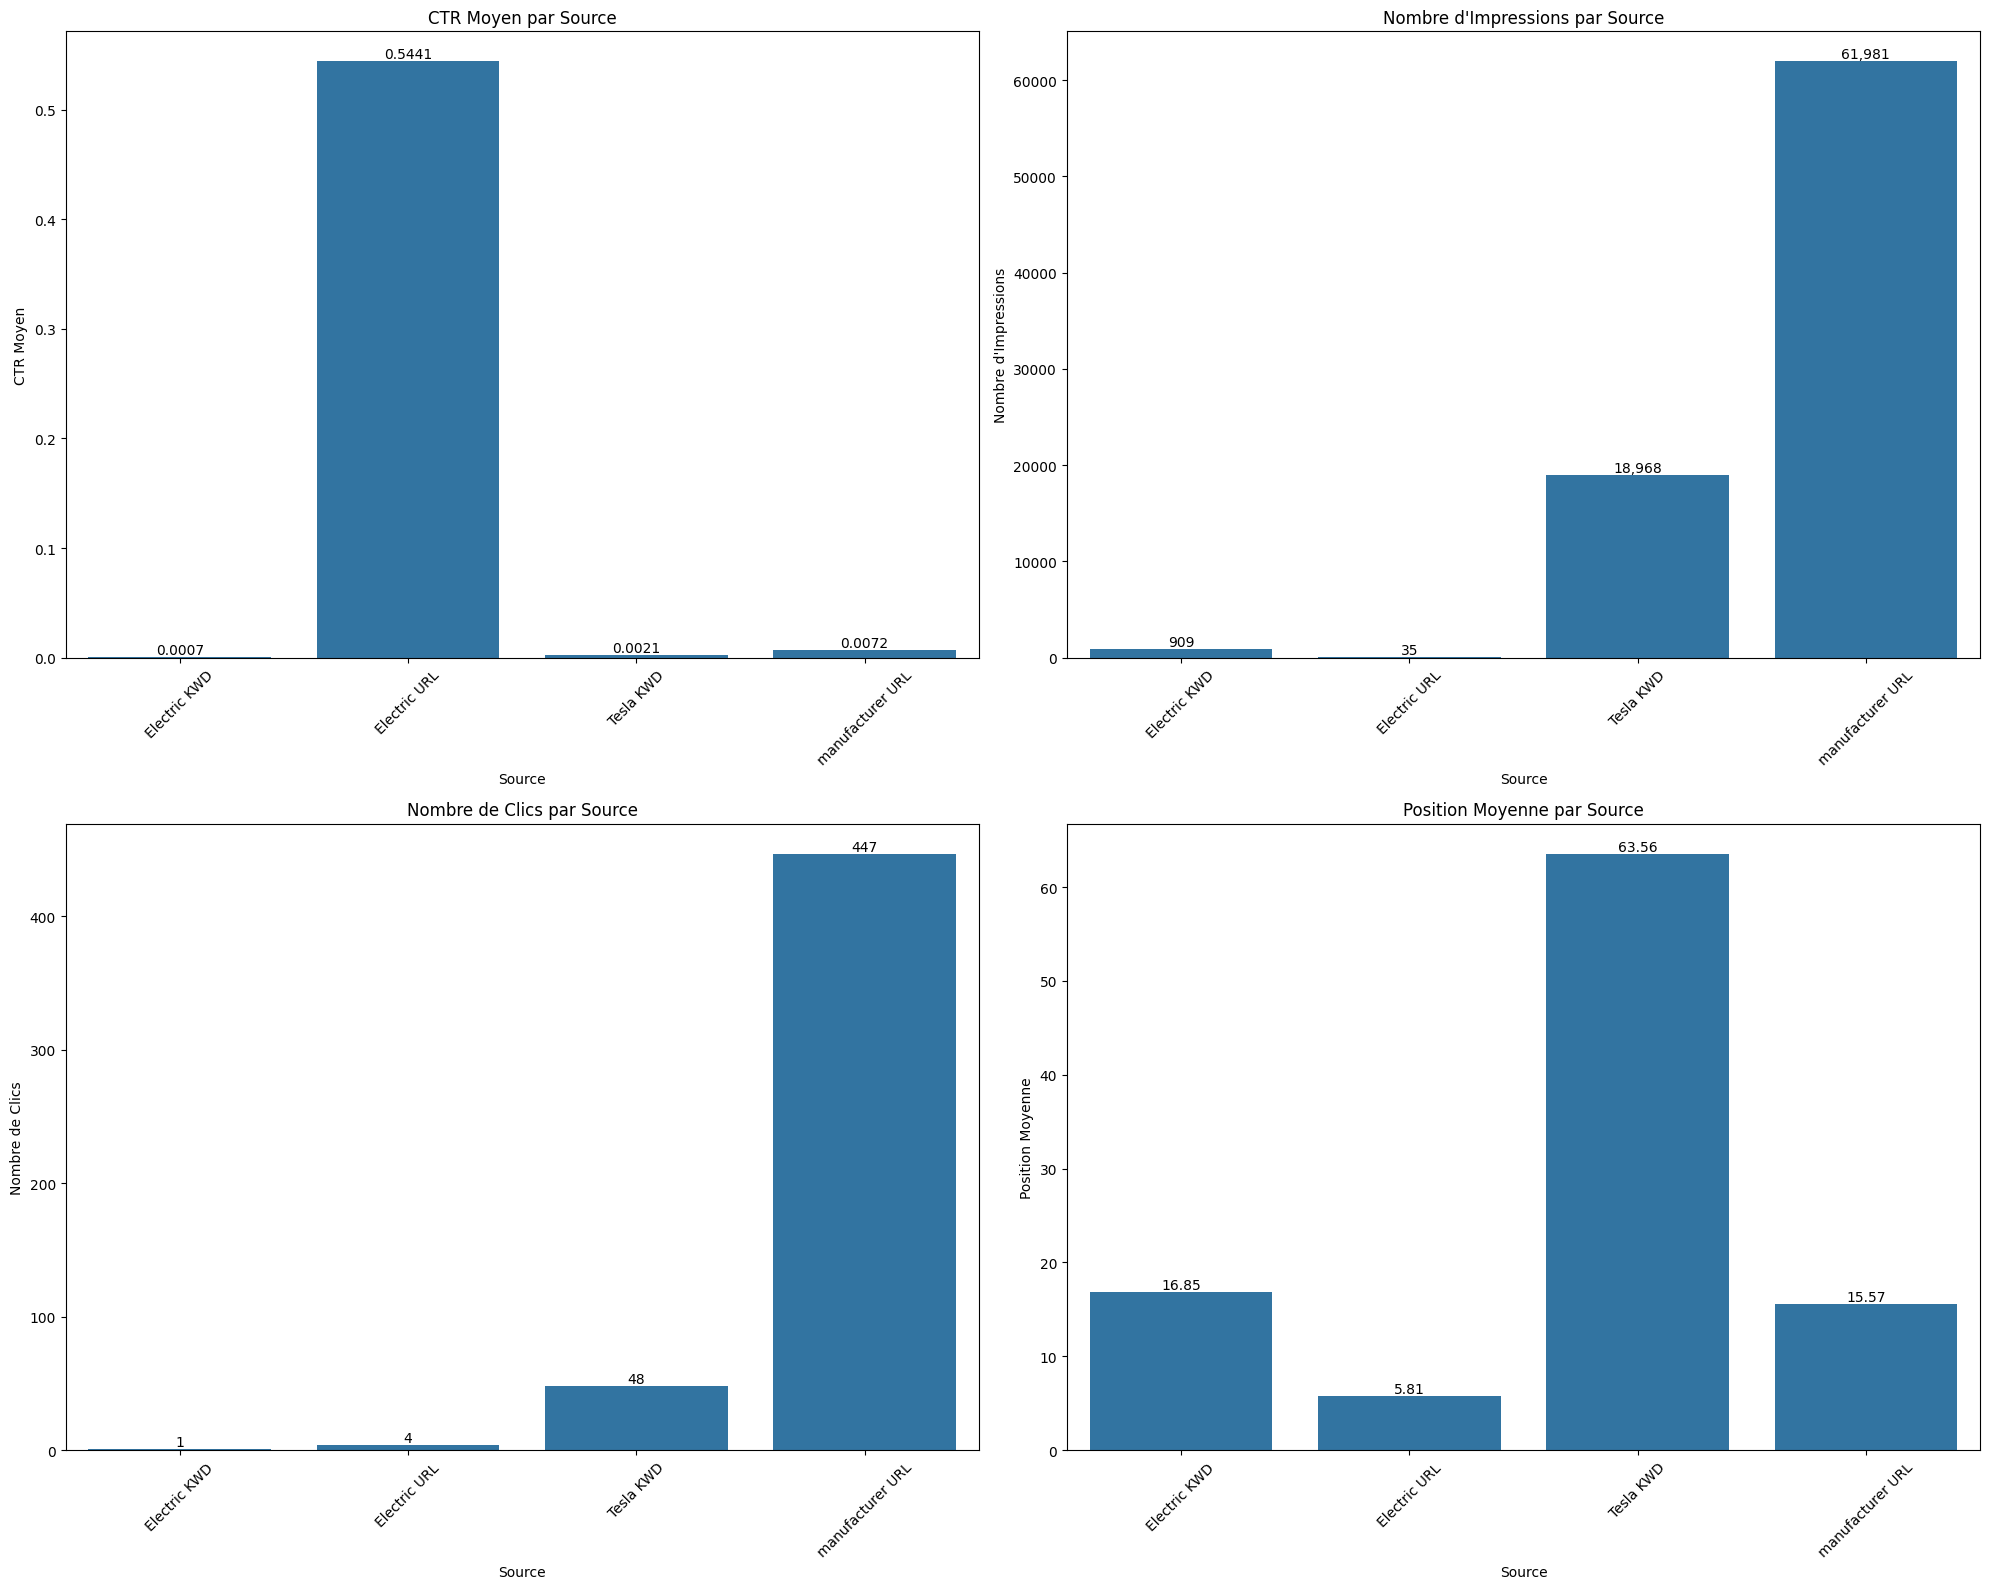

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def distribution_source(df_filtered):
    """
    Analyser et visualiser la distribution des sources
    """
    # Agrégation par source
    distribution = df_filtered.groupby('Source').agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': 'mean',
        'Position': 'mean'
    })
    
    # Calculer les parts
    distribution['Part_Clics'] = distribution['Clics'] / distribution['Clics'].sum() * 100
    distribution['Part_Impressions'] = distribution['Impressions'] / distribution['Impressions'].sum() * 100
    
    # Arrondir les valeurs
    distribution['CTR'] = distribution['CTR'].round(4)
    distribution['Position'] = distribution['Position'].round(2)
    distribution['Part_Clics'] = distribution['Part_Clics'].round(2)
    distribution['Part_Impressions'] = distribution['Part_Impressions'].round(2)
    
    # Afficher la distribution
    print("Distribution des sources :")
    print(distribution)
    
    # Créer une figure avec 4 sous-graphiques
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    
    # 1. Graphique CTR par source
    sns.barplot(x=distribution.index, y=distribution['CTR'], ax=ax1)
    ax1.set_title('CTR Moyen par Source', fontsize=12)
    ax1.set_xlabel('Source')
    ax1.set_ylabel('CTR Moyen')
    ax1.tick_params(axis='x', rotation=45)
    for i, v in enumerate(distribution['CTR']):
        ax1.text(i, v, f'{v:.4f}', ha='center', va='bottom')
    
    # 2. Graphique Impressions par source
    sns.barplot(x=distribution.index, y=distribution['Impressions'], ax=ax2)
    ax2.set_title('Nombre d\'Impressions par Source', fontsize=12)
    ax2.set_xlabel('Source')
    ax2.set_ylabel('Nombre d\'Impressions')
    ax2.tick_params(axis='x', rotation=45)
    for i, v in enumerate(distribution['Impressions']):
        ax2.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
    
    # 3. Graphique Clics par source
    sns.barplot(x=distribution.index, y=distribution['Clics'], ax=ax3)
    ax3.set_title('Nombre de Clics par Source', fontsize=12)
    ax3.set_xlabel('Source')
    ax3.set_ylabel('Nombre de Clics')
    ax3.tick_params(axis='x', rotation=45)
    for i, v in enumerate(distribution['Clics']):
        ax3.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
    
    # 4. Graphique Position moyenne par source
    sns.barplot(x=distribution.index, y=distribution['Position'], ax=ax4)
    ax4.set_title('Position Moyenne par Source', fontsize=12)
    ax4.set_xlabel('Source')
    ax4.set_ylabel('Position Moyenne')
    ax4.tick_params(axis='x', rotation=45)
    for i, v in enumerate(distribution['Position']):
        ax4.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    
    # Ajuster la mise en page
    plt.tight_layout()
    
    # Créer le dossier assets s'il n'existe pas
    os.makedirs('../assets', exist_ok=True)
    
    # Sauvegarder l'image
    plt.savefig('../assets/sources_metrics.png', dpi=300, bbox_inches='tight')
    
    # Afficher le graphique
    plt.show()
    
    return distribution

resultat = distribution_source(df_filtered)

Comme pour les appareils, c'est la source *Electric URL* qui obtient les meilleurs résultats CTR et *Electric KWD* les pires.

Mais à nouveau, en terme de visibilité, comme pour les appareils, c'est *manufacturer URL* qui est plus visible et le plus cliqué.

Ici également, dans les **deux cas** que ce soit pour la visibilité ou pour "l'engagement", ce sont les URL qui ont donné de meilleurs résultats comparativement aux keyword 

Mais une grosse retenue est émise au niveau des intérprétations pourvant être faites avec les 35 impressions réalisées par *electric URL* qui semble être un résultat très étrange - trop faible pour avancer des arguments de façon certaine.

## Performance par type d'apparence :

### Extraits de produits :

90.40% des clics

79.11% des impressions

CTR moyen : 0.70%

### Extrait d'avis :

9.00% des clics

20.85% des impressions

CTR moyen : 0.26% (Plus faible performance)

### Résultats traduits :

0.60% des clics

0.04% des impressions

CTR moyen : 8.82% (Meilleur taux)

#### Ces statistiques montrent clairement que les "Extraits de produits" dominent en termes de volume avec plus de 90% des clics et près de 80% des impressions. Cependant, ce sont les "Résultats traduits" qui offrent le meilleur taux de conversion avec un CTR impressionnant de 8.82%, bien qu'ils ne représentent qu'une très petite portion du trafic. À l'inverse, les "Extraits d'avis" ont la plus faible performance avec un CTR de seulement 0.26%.

Performance par source :
manufacturer URL :
89.40% des clics
75.69% des impressions
CTR moyen : 0.72%
Tesla KWD :
9.60% des clics
23.16% des impressions
CTR moyen : 0.25%
Electric URL :
0.80% des clics
0.04% des impressions
CTR moyen : 11.43% (Meilleur taux)
Electric KWD :
0.20% des clics
1.11% des impressions
CTR moyen : 0.11% (Plus faible performance)